In [2]:
import numpy as np
import matplotlib.pyplot as plt

import xarray as xr

import cartopy as cr
import cartopy.crs as ccrs
import cartopy.feature as cf

In [3]:
pre = xr.open_dataset('../task-5/cru_ts4.06.1990.2010.J_A.pre.dat.nc')
tmp = xr.open_dataset('../task-5/cru_ts4.06.1990.2010.J_A.tmp.dat.nc')

In [4]:
pre_tmp = xr.open_dataset('../task-5/cru_ts4.06.1990.2010.pre_tmp.spatial_corr.dat.nc')

In [5]:
pre_tmp_avg = np.mean(pre_tmp['pre'],axis=(0))

In [6]:
pre_tmp_avg.shape

(360, 720)

In [7]:
lon = pre_tmp.lon
lat = pre_tmp.lat

c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:451: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
c:\Users\Akshit Nanda\anaconda3\lib\site-packages\cartopy\mpl\gridliner.py:487: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.
  warnings.warn('The .ylabels_right attribute is deprecated. Please '


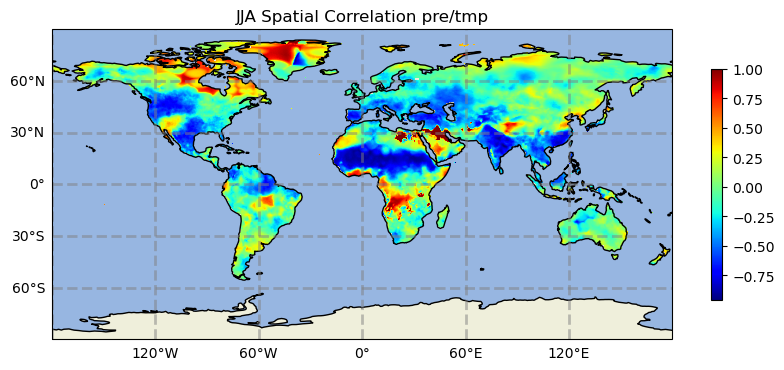

In [10]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

mp = ax.imshow(pre_tmp_avg,extent=(lon.min(),lon.max(),lat.min(),lat.max()),cmap='jet',origin='lower')

ax.add_feature(cf.LAND)
ax.add_feature(cf.COASTLINE)
ax.add_feature(cf.OCEAN)

cbar = fig.colorbar(mp, shrink=0.3)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_right = False

plt.title('JJA Spatial Correlation pre/tmp')
plt.savefig("../task-5/plots/JJA Spatial Correlation pre_tmp.png")